**Data Analysis Project: MPG and Model Year in Automobiles**

**Overview**

In this project we are analyzing the correlation between Model Year and Fuel Efficiency. This is an important topic because as we move into a greener more advanced society we should expect fuel efficiency to be increasing over time. We are also going to try and predict fuel efficiency over time.

The datasets we will be using for this project are: <br>
    UCI Auto MPG Dataset - https://archive.ics.uci.edu/ml/datasets/auto+mpg <br>
    Fueleconomy.gov - https://www.fueleconomy.gov/feg/download.shtml

The project layout will be the following :
 1. Data Exploration and Cleaning
 2. Data Enriching
 3. Data Visualization and Analysis
 4. Implementing, Improving and Evaluating Linear Regression Models




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

**Data Exploration and Cleaning**



<br>
We need to import our dataset, using the correct delimeters and labeling our columns accordingly.

In [38]:
data = pd.read_csv('../Data/auto-mpg.data', delimiter='\s+', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Name']) # importing our data

df = pd.DataFrame(data) # getting copy of data dataframe

In [39]:
df.shape # gets shape of our data

(398, 9)

We can see here that our data has 9 columns and 398 rows.

In [40]:
print(df.head()) # pritns first 5 values

    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year   
0  18.0          8         307.0      130.0  3504.0          12.0          70  \
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   Origin                       Name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [41]:
dataTypes = df.dtypes.to_frame(name='Data Types') # turn data types into data frame

dataTypes # prints data types

# dataTypes.to_csv('dtypes.csv') get data types for tableau visualization


,Data Types
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,object
Weight,float64
Acceleration,float64
Model Year,int64
Origin,int64
Name,object


We can see here that Horsepower appears to be a float when we got the first 5 entries. However checking the data type it is an object.


<br>
Missing values could be causing this discrepancy so it is important to investigate it.

In [42]:
is_clean = df.isnull().sum() # finds any missing values for each column and sums it

print(is_clean) # print results

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Name            0
dtype: int64


We can see that checking for missing values didn't produce any results. This means something else must be causing the data type confusion.


<br>
At this point it would be useful to check all the unique values in Horsepower

In [43]:

print(df['Horsepower'].unique()) # gets all unique values

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


We can see in the midst of these numbers is a '?'. This is likely what the dataset uses for missing values.


<br>
We should replace these '?' with something better.

In [44]:
df = df.replace('?',np.nan) # replaces '?' with NaN

Now that we replaced our off data we can see how many missing values there actually is.

In [45]:
is_clean = df.isnull().sum() # checks for missing values (nan)

clean_table = is_clean.to_frame(name='Missing Values') # turns into pandas table

clean_table # print table

# clean_table.to_csv('missingValues.csv') get missing values for tableau visualization

,Missing Values
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0
Name,0


We can see that we have 6 missing values in Horsepower. We can either drop the rows containing the missing data or fill it in with an educated number. Since we already have a relatively small dataset and unlikely to use Horsepower at this point, we will fill it in with the mean.

In [46]:
df['Horsepower'] = pd.to_numeric(df['Horsepower']) # turn horsepower into numeric column

horse_mean = df['Horsepower'].mean() # get the mean of the column

df['Horsepower'].fillna(horse_mean, inplace=True) # fill in missing values with mean

df['Horsepower'].isnull().sum() # check if missing values still exist


0

We can see that Horsepower no longer has any missing values.

**Data Encriching**


<br>
Since our dataset is relatively small, 398 points, and only spans 11 years, we are going to enrich it with another dataset. This will increase our total range of data which will give us better insights into the problem

In [47]:
secondData = pd.read_csv('../Data/AllCarsCondensed.csv') # read the csv

#get data types for standardizing
print(secondData.dtypes)
print(len(secondData))

Model Year      int64
FullName       object
MPG             int64
Eng Displ     float64
# Cyl           int64
dtype: object
29236


In [48]:
thirdData = pd.read_csv('../Data/cleanData.csv')

#get data types for standardizing
print(thirdData.dtypes)
print(len(thirdData))

year           int64
index          int64
displ        float64
comb08         int64
model         object
cylinders    float64
mpgData       object
dtype: object
3993


Since our new data is in a slighlty different format we need to make everything cohesive. We need to standardize the names of the columns, make the variable types uniform and standardize variable measurements uniform.

In [49]:
#standardize measurements
df['Model Year'] = df['Model Year'] + 1900 # formats years properly

secondData['Eng Displ'] = secondData['Eng Displ']*100 # standardizes displacement
thirdData['displ'] = thirdData['displ']*100

In [50]:
#standardize variable types
thirdData['comb08'] = thirdData['comb08'].astype(float)
secondData['MPG'] = secondData['MPG'].astype(float)

In [51]:
# standardize column names
secondData = secondData.rename(columns={'FullName' : 'Name','Eng Displ': 'Displacement', '# Cyl': 'Cylinders'}) # rename columns

thirdData = thirdData.rename(columns={'year' : 'Model Year','displ': 'Displacement', 'cylinders': 'Cylinders','model':'Name','comb08':'MPG'})

Now that all of our data is uniform we can merge it to our original dataset. Once this is done we will have some columns that are uncommon that need to be dropped.

In [52]:
#merge the data
df=df.merge(secondData,how='outer')
df=df.merge(thirdData,how='outer')

#drop the uncommon datasets
df = df.drop(['Horsepower','Weight','Acceleration','Origin','mpgData','index'],axis=1)

df # see if it worked correctly

,MPG,Cylinders,Displacement,Model Year,Name
0,18.0,8.0,307.0,1970,chevrolet chevelle malibu
1,15.0,8.0,350.0,1970,buick skylark 320
2,18.0,8.0,318.0,1970,plymouth satellite
3,16.0,8.0,304.0,1970,amc rebel sst
4,17.0,8.0,302.0,1970,ford torino
...,...,...,...,...,...
33622,24.0,4.0,190.0,1993,SL
33623,28.0,4.0,190.0,1993,SL
33624,25.0,4.0,190.0,1993,SL
33625,21.0,4.0,220.0,1993,Legacy AWD


We will finally see the different statistics to get a better idea of our datasets before we visualize them.

In [53]:
temp = pd.DataFrame(df.describe()) # turns our describe statistics into data frame

temp # prints data frame

#file = temp.to_csv('describe.csv') turn into csv to create tableau visualization

,MPG,Cylinders,Displacement,Model Year
count,33627.000000,33627.000000,33627.000000,33627.000000
mean,21.652059,5.783686,328.294035,2008.450382
std,5.658519,1.790942,132.477388,10.192549
min,9.000000,2.000000,68.000000,1970.000000
25%,18.000000,4.000000,220.000000,2002.000000
50%,21.000000,6.000000,300.000000,2010.000000
75%,25.000000,6.000000,400.000000,2017.000000
max,65.000000,16.000000,840.000000,2024.000000


**Data Visualization**


Now that we've explored our data, it's time to take a closer look at our dependent variable (MPG). We have chose this as our dependent variable as we are analyzing fuel efficiency over time. That makes MPG a function of Model Year. Model Year also fits as our independent variable because of its discrete natural ordering.

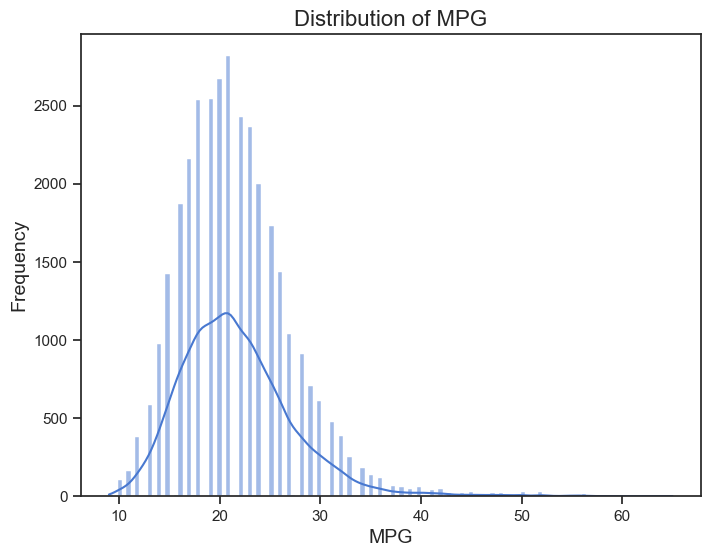

In [54]:
y = df['MPG'] # Define independent variable (MPG)

plt.figure(figsize=(8,6)) # change the size of plot

colors = sns.color_palette('muted') # get muted color pallete

sns.histplot(y,kde=True,color=colors[0]) # graph plot with kde line

plt.xlabel("MPG", fontsize=14) # label x axis
plt.ylabel("Frequency", fontsize=14) # label y axis

plt.title("Distribution of MPG", fontsize=16) # give title

# plt.savefig('mpgdist.jpg',dpi=300) turn plot into jpg

plt.show() # shows plot

We can see from this visualization that or data is positively skewed and unimodal.

<br>
It would be useful to get a numerical understanding of our skew and find out our kurtosis

In [55]:
print("Skewness: %f" % df['MPG'].skew()) # prints skew
print("Kurtosis: %f" % df['MPG'].kurt()) # prints kurtosis

Skewness: 1.253741
Kurtosis: 3.951499


We have a positive skew meaning that our data tends to fall slightly above the median. The high kurtosis indicates that we have a lot of extreme values in our data.



In [56]:
x=df['Model Year'] # initialize independent variable 

print(sorted(x.unique())) # check unique values 

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [57]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upperMPG = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lowerMPG = Q1 - (1.5 * IQR)

outliers = df['MPG'][(y < lowerMPG) | (y > upperMPG)].values # search for outliers

print(f"The outliers are {outliers}") # prints outliers
print(len(outliers))

The outliers are [36.  43.1 36.1 39.4 36.1 35.7 37.3 41.5 38.1 37.2 37.  46.6 40.8 44.3
 43.4 36.4 44.6 40.9 39.1 39.  37.  37.7 36.  37.  38.  36.  36.  36.
 38.  38.  38.  36.  44.  41.  43.  36.  38.  36.  41.  36.  36.  43.
 38.  45.  38.  45.  38.  45.  41.  43.  36.  38.  36.  41.  36.  36.
 43.  38.  45.  38.  45.  38.  45.  39.  42.  36.  38.  65.  39.  37.
 38.  45.  38.  45.  38.  45.  37.  39.  64.  39.  36.  37.  48.  38.
 45.  38.  45.  38.  45.  36.  37.  39.  56.  64.  36.  37.  48.  38.
 45.  38.  45.  38.  45.  38.  45.  37.  39.  48.  48.  56.  64.  36.
 38.  48.  38.  45.  38.  45.  38.  45.  38.  45.  37.  39.  47.  47.
 48.  48.  56.  63.  36.  38.  55.  36.  41.  36.  41.  36.  41.  38.
 41.  37.  39.  47.  47.  48.  48.  56.  63.  36.  36.  38.  55.  36.
 41.  36.  41.  36.  41.  38.  41.  50.  56.  63.  36.  55.  37.  40.
 38.  38.  38.  40.  50.  39.  39.  36.  55.  36.  37.  42.  36.  36.
 46.  42.  46.  39.  39.  42.  41.  41.  36.  36.  50.  39.  39.  39.
 4

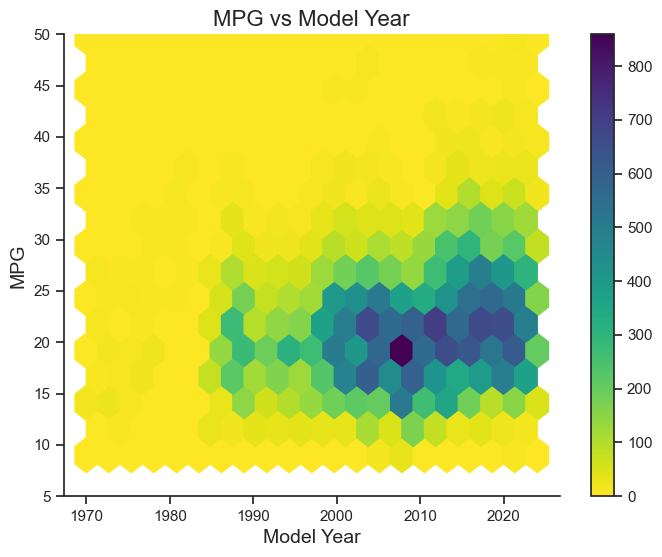

In [58]:
fig = plt.figure(1,figsize=(8,6)) # set size of plot

plt.hexbin(x,y,gridsize=20,cmap='viridis_r') # empty scatter plot
plt.colorbar()

#plt.xticks([]) #Removes number labels
#plt.yticks([])

plt.ylim(5,50)

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)


plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year',fontsize=16) # Gives our plot a title

# plt.savefig('mpgvsyear.jpg',dpi=300) turns plot into jpg

plt.show() # displays graph

We can see in the graph there seems to be a slight positive trend. It also shows us that most of our data is concentrated between 2000-2020 and 15-25 MPG, indicated by the densities. We will now investigate this further since a visualization can only give us a rough idea of what is going on 

In [59]:

r = x.corr(y,method='pearson') # calculates our correlation using pearson correlation

print(f"The correlation coefficient is {r}") # prints correlation coefficient

The correlation coefficient is 0.13710078939342699


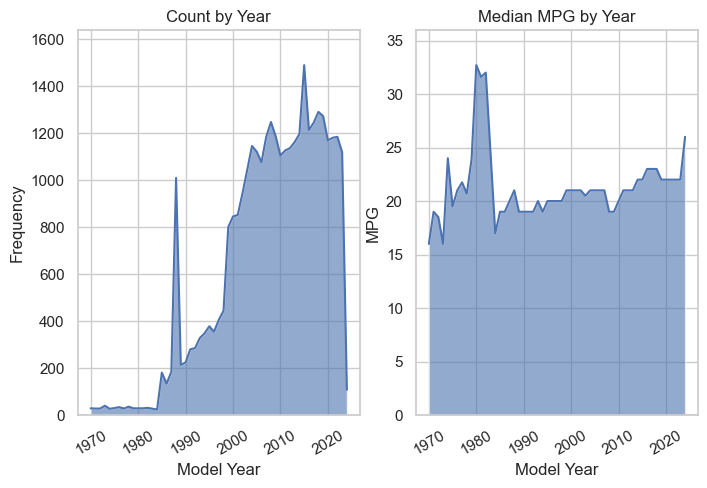

In [60]:
medianByYear = df.groupby('Model Year')['MPG'].median() # get median value for each year
countByYear = df.groupby('Model Year')['MPG'].count()  # get count of mpg for each year
eachYear = sorted(x.unique()) # get all Model Years

sns.set_style("whitegrid")
# Initialize two plots
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Plot our count plot
axs[0].plot(eachYear, countByYear)
axs[0].set_title('Count by Year')

# Plot our mpg median plot
axs[1].plot(eachYear, medianByYear)
axs[1].set_title('Median MPG by Year')

#rotate the ticks
axs[0].tick_params(axis='x', labelrotation=30)
axs[1].tick_params(axis='x', labelrotation=30)

#sets x axis labels
axs[0].set_xlabel('Model Year')
axs[1].set_xlabel('Model Year')

# sets y axis labels
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('MPG')

#scales the plot
axs[0].set_ylim([0, max(countByYear)*1.1])
axs[1].set_ylim([0, max(medianByYear)*1.1])

axs[0].fill_between(eachYear,countByYear,alpha=.6)
axs[1].fill_between(eachYear,medianByYear,alpha=.6)

# plt.savefig('twoPlots.jpg',dpi=300)
# show the plots
plt.show()

Our correlation analysis indicates that there is no correlation between MPG and Model Year.



<br>
We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate. This will give us further insight to the relation between our variables and help us identify any issues with our data. It will also give us a nice visualization as we can see the slope of our line in accordance to our data.

In [61]:
x_arr = np.array(x) # create numpy arrays for x and y
y_arr = np.array(y)

x_arr = preprocessing.scale(x_arr) # standardize x array

X_train, X_test, y_train, y_test = train_test_split(x_arr,y_arr,test_size=.3) # get training sample

lm = LinearRegression() # creating object 

lm.fit(X_train.reshape(-1,1),y_train) # fit our data

simpleAcc = lm.score(X_test.reshape(-1,1),y_test) # calculate accuracy

pred_y = lm.predict(x_arr.reshape(-1,1)) # predict variables


We now are using our graph from before and adding a linear regression line using our predicted y values. This provides a great medium for us to see our predicted values.

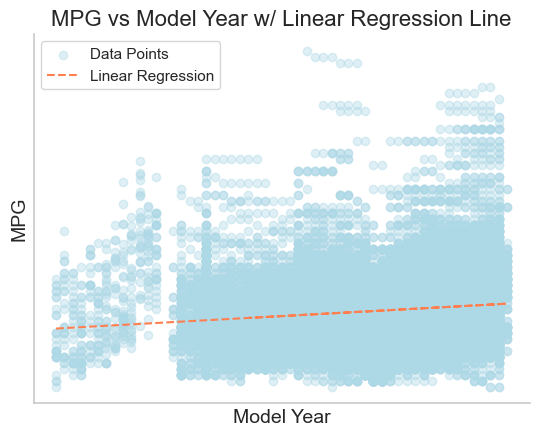

In [62]:

scatter = plt.scatter(x,y,c='lightblue',alpha=.4,label='Data Points') # initialize scatterplot

linReg, = plt.plot(x,pred_y,c='coral',label='Linear Regression',linestyle='--') # intitialize linear regression line

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year w/ Linear Regression Line',fontsize=16) # gives a plot title

plt.legend() # adds legend

# plt.savefig('simpleReg.jpg',dpi=300) 

plt.show() # shows plot

This graph provides a great visual for seeing our predicted values versus our actual values. However there is obviously a lot of variability in this graph. It would be beneficial to use a more robust regression analysis.




<br>
Considering all of this variability with our Simple Linear Regression, we should find a model that fits our data better. A good fit would be a Multiple Linear Regression as it is just a slight step up. 
<br>

For this model we want to add a feature, however this feature needs to follow two conditions:<br>
    &emsp; 1. It should have a strong correlation with MPG<br>
    &emsp; 2. It shouldn't be linearly correlated with Model Year 


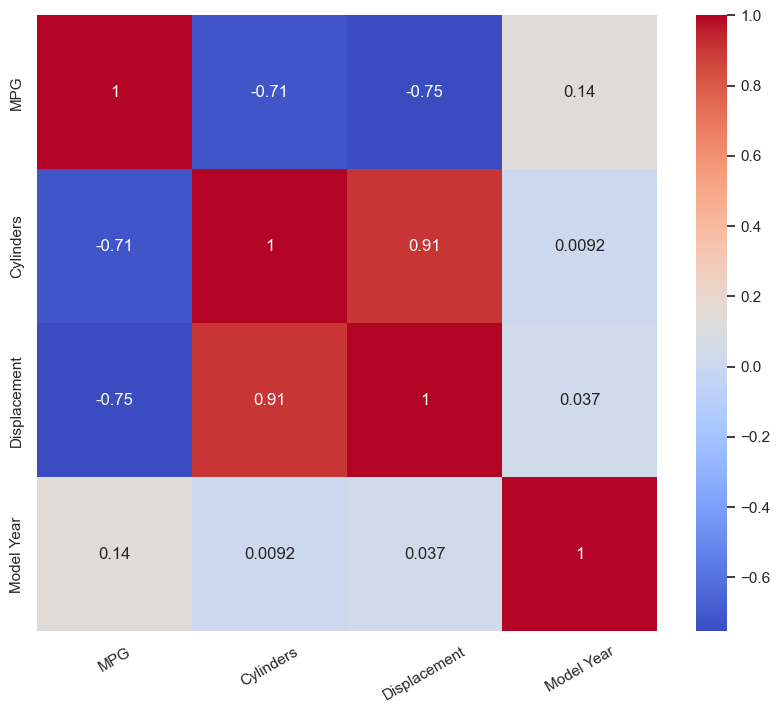

In [63]:
numerical_data = df.drop('Name',axis=1) # get our numerical data by dropping name

r_matrix = numerical_data.corr() # get correlation matrix

plt.figure(figsize=(10,8))

sns.heatmap(r_matrix,annot=True,cmap='coolwarm') # make heatmap for our correlation matrix

plt.xticks(rotation=30)

# ('corrmatrix.jpg',dpi=300)

plt.show() # show plot


From this heatmap we can see which variables are strongly correlated with MPG. We can see that {Cylinders, Displacement} are potential candidates.


<br>
Since they satisfy (1.), We know need to check if they satisfy (2.). We can do this by checking for multicollinearity, which is evaluted using a metric called VIF. We are looking at the lowest values as they indicate less multicollinearity. The VIF can be analyzed as 1 : not correlated, 1-5 : moderately correlated and 5+ : highly correlated. Ideally we will find a value close to 1.

In [64]:
X_var = [df[['Model Year','Cylinders']],df[['Model Year','Displacement']]] # get all of our correlated variables

vif_data = {} # get empty list

for X_vars in X_var: # for each of the correlated variables
    value = [variance_inflation_factor(X_vars.values, i) for i in range(len(X_vars.columns))]
    vif_data[tuple(X_vars.columns)] = value # add the name of the variables


vif_data=pd.DataFrame(vif_data) # turn into Data Frame
vif_data = vif_data.drop(index=vif_data.index[1]) # drop duplicate

vif_data # print table

# vif_data.to_csv('vifTable.csv') get csv file to make tableau visualization

Model Year             
   Cylinders Displacement
0  11.429758     7.146666

From this table we can see that Displacement has the lowest VIF score which is our best candidate for a Multiple Linear Regression.


<br>
We already know that Displacement and MPG have a strong correlation from our Correlation Matrix Heatmap. However, it is still useful to visualize it so we can see any possible outliers and analzye our curve type.

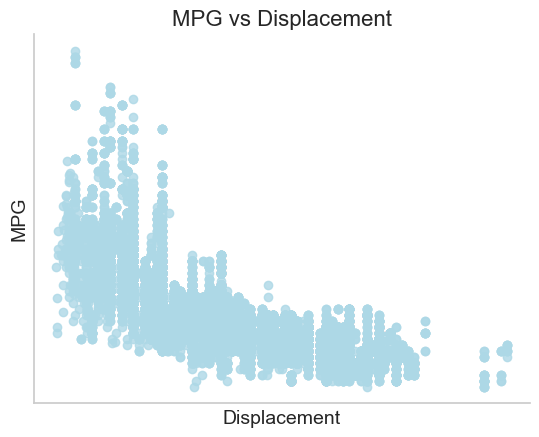

In [65]:
displacement = df['Displacement'] # get displacement column

plt.scatter(displacement,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Displacement',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Displacement',fontsize=16) # Give our plot a title

# plt.savefig('mpgvsdis.jpg',dpi=300) 

plt.show() # show plot


In [66]:
print(y.corr(displacement,method='spearman'))

-0.8498750016375852


With this visualization we see that there seems to be a strong negative correlation, possibly exponential decay, between MPG and Weight. We can also see some possible outliers. We will repeat our previous analysis and check more concretely for outliers and understand our correlation.

In [67]:
Q1 = displacement.quantile(0.25) # Calculate our quartiles
Q3 = displacement.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['Displacement'][(displacement < lower) | (displacement > upper)].values # search for outliers

print(f"The outliers are {outliers}") # print outliers

The outliers are [680. 680. 680. 680. 680. 680. 680. 680. 680. 680. 680. 680. 680. 680.
 680. 680. 800. 800. 680. 680. 680. 680. 680. 800. 800. 680. 680. 680.
 800. 800. 680. 680. 680. 680. 680. 830. 680. 680. 830. 830. 680. 680.
 830. 830. 830. 680. 680. 700. 830. 830. 830. 700. 800. 700. 840. 840.
 700. 680. 680. 800. 840. 840. 700. 680. 800. 680. 680. 700. 680. 800.
 680. 680. 700. 680. 800. 840. 680. 680. 700. 680. 800. 840. 680. 680.
 700. 840. 700. 680. 800. 840. 680. 840. 680. 680. 800. 680. 800. 680.
 800. 800. 680. 800. 800. 800. 800. 800. 800. 800. 800.]


In [68]:
multiple_x = df[['Model Year', 'Displacement']].values # creating an x intercept with Model Year and Weight

x_arr = np.array(multiple_x) # create numpy arrays for x and y
y_arr = np.array(y)

x_arr = preprocessing.scale(x_arr)

multiLM = LinearRegression() # Creating LinearRegression instance

X_train, X_test, y_train, y_test = train_test_split(x_arr,y_arr,test_size=.3)

multiLM.fit(X_test,y_test) # Fitting our x and y

multiPred_y = multiLM.predict(x_arr) # getting our prediction array

multiAcc = multiLM.score(X_train,y_train) # get our models accuracy

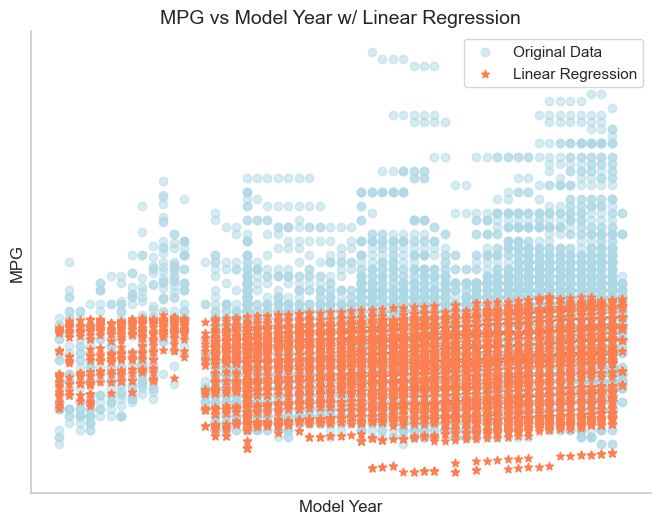

In [69]:

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)


plt.xlabel('Model Year',fontsize=12) # Gives our axes a label
plt.ylabel('MPG',fontsize=12)

plt.title('MPG vs Model Year w/ Linear Regression',fontsize=14) # gives a plot title

scatter = plt.scatter(x, y, c='lightblue', alpha=.5, label='Original Data') # plot original data
linReg = plt.scatter(x,multiPred_y,c='coral', alpha=1.0, label='Linear Regression',marker='*') # plot linear regression line

plt.legend() # add legend
plt.grid() # add grid

# plt.savefig('multiLinReg.jpg',dpi=300) 

plt.show() # shows plot

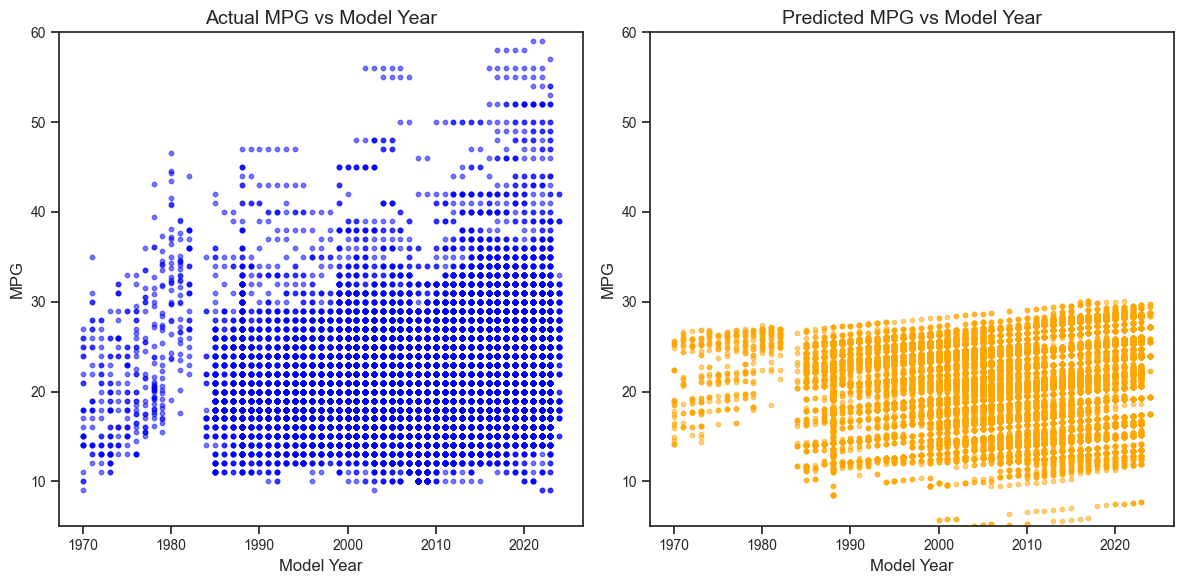

In [70]:
sns.set(style='ticks')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.scatter(x, y, s=10, c='blue', alpha=0.5)
ax1.set_title('Actual MPG vs Model Year', fontsize=14)
ax1.set_xlabel('Model Year', fontsize=12)
ax1.set_ylabel('MPG', fontsize=12)
ax1.tick_params(axis='both', which='both', labelsize=10)
ax1.set_ylim(5,60)

# Plot 2
ax2.scatter(x, multiPred_y, s=10, c='orange', alpha=0.5)
ax2.set_title('Predicted MPG vs Model Year', fontsize=14)
ax2.set_xlabel('Model Year', fontsize=12)
ax2.set_ylabel('MPG', fontsize=12)
ax2.tick_params(axis='both', which='both', labelsize=10)
ax2.set_ylim(5,60)


plt.tight_layout()
# plt.savefig('two_scatterplots.jpg', dpi=300)
plt.show()

From this data visualization we can obviously tell this fits the data much better than our Simple Linear Regression. We will now calculate the variation between the two too get an understanding of the magnitude. We will use R^2 score because it is a better for comparing correlation between two different things. This is because the score is more intituitive then the regular R score.

In [71]:

# r2 score for our simple linear regression
print(f"The R^2 score for our Simple Linear Regression {simpleAcc}")

# r2 score for our multiple linear regression
print(f"The R^2 score for our Multiple Linear Regression {multiAcc}")

r2_Improvement = (multiAcc / simpleAcc) * 100
print(f"The Multiple Linear Regression explains our variation more by a magnitude of {r2_Improvement}%")



The R^2 score for our Simple Linear Regression 0.017388149395572094
The R^2 score for our Multiple Linear Regression 0.5932398290838004
The Multiple Linear Regression explains our variation more by a magnitude of 3411.7479415887083%


**Conclusion**

Our data would suggest that Model Year isn't the best predictor for MPG or fuel efficiency. This is an unexpected result due to the advances in automobile technology and societal pushes for more fuel efficiency over the years. Despite this result we were still able to predict MPG with the help of better correlated predictors. This allowed our model to get from zero accuracy to that of 60%. 